## Fitting the spectrum of the events

In this notebook, we will compute the spectrum of all the events with the Welch method and fit two segments in the spectrum to extract features.

In [1]:
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt 

import analysis
import catalog
import figures

tqdm.pandas()
catalog.display_parameters()

## Load the catalog

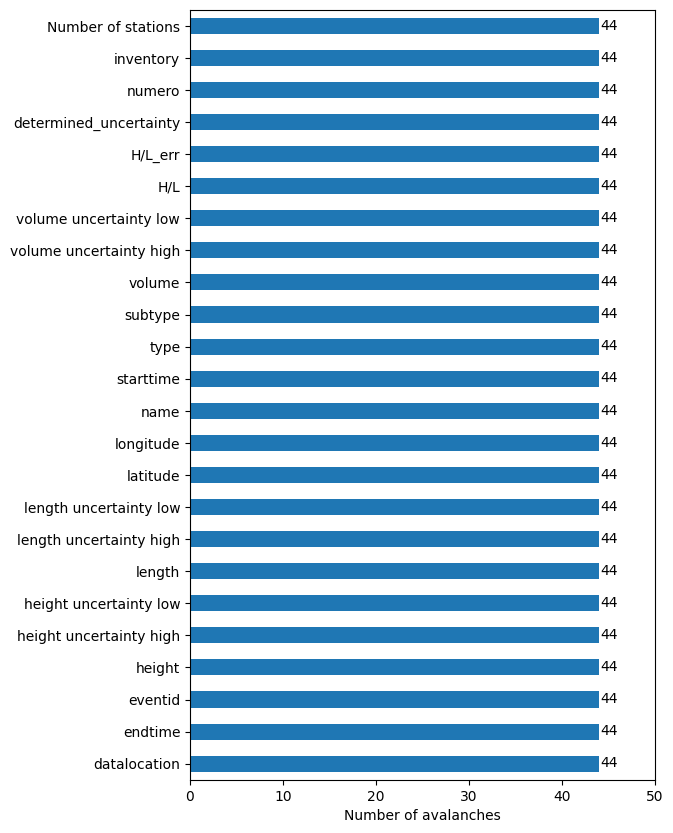

In [2]:
ESEC_avalanches = catalog.load("catalog/7_ESEC_avalanches_44.pickle")

catalog.open_plot(ESEC_avalanches, pos_number=0.11, xlim=50)

## Spectrum of all events

  0%|          | 0/44 [00:00<?, ?it/s]

-------------------------
Event numero 0
-------------------------
The distance of the trace is 48.81039753705775
Detection on trace 0


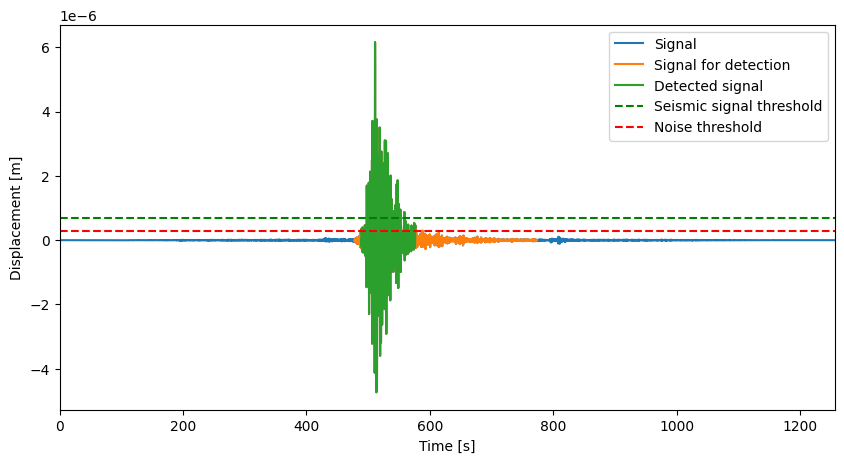

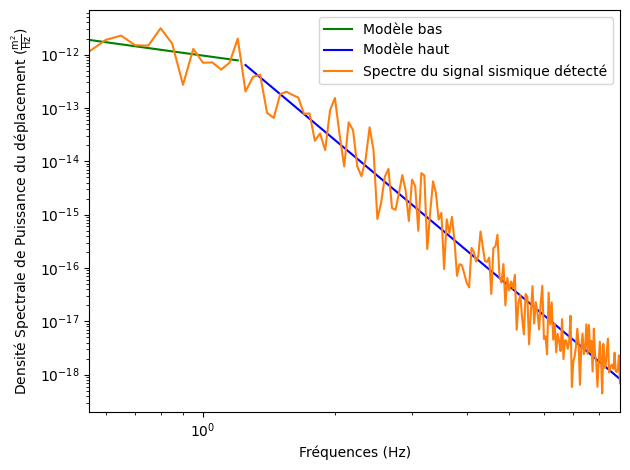

-------------------------
Event numero 1
-------------------------
The distance of the trace is 536.0589549661717
Detection on trace 0


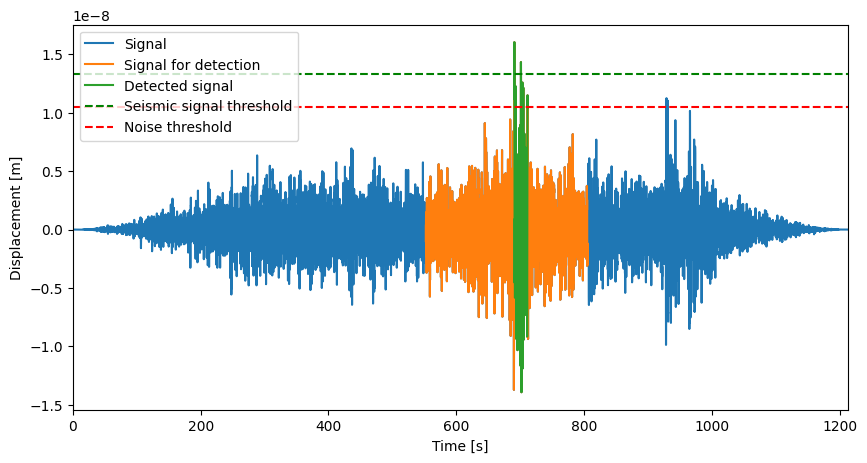

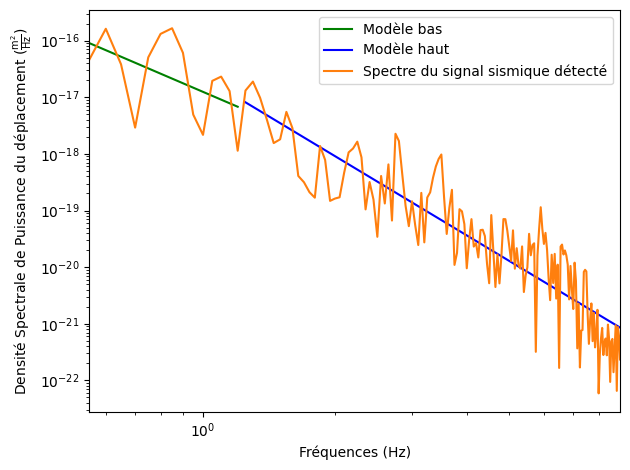

-------------------------
Event numero 2
-------------------------
The distance of the trace is 17.706438612134626
Detection on trace 0


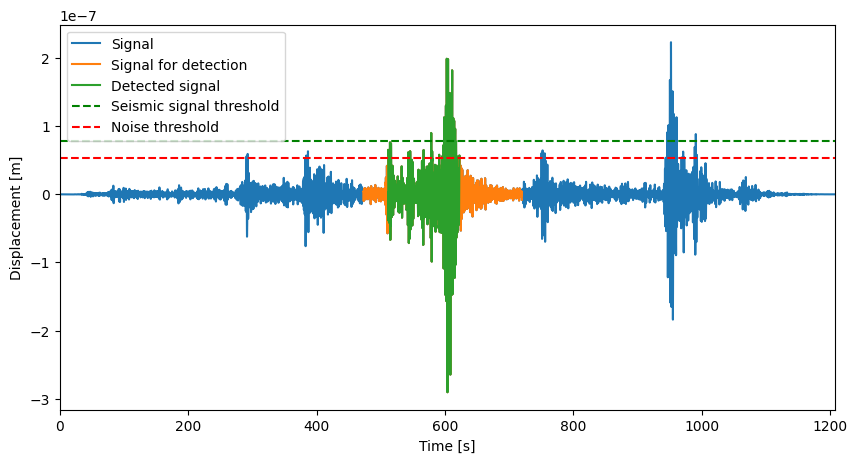

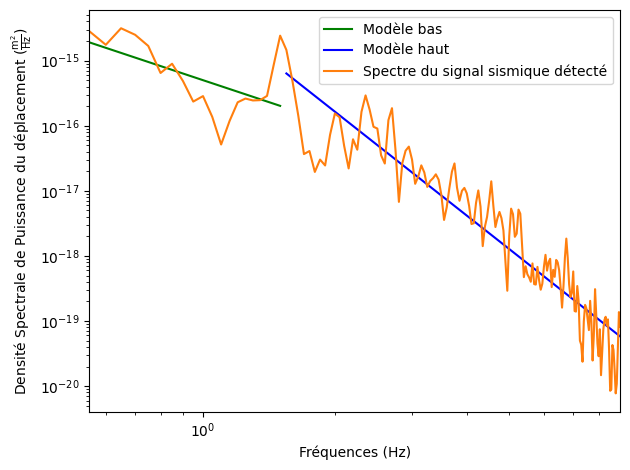

-------------------------
Event numero 3
-------------------------
The distance of the trace is 67.24607360705616
Detection on trace 0


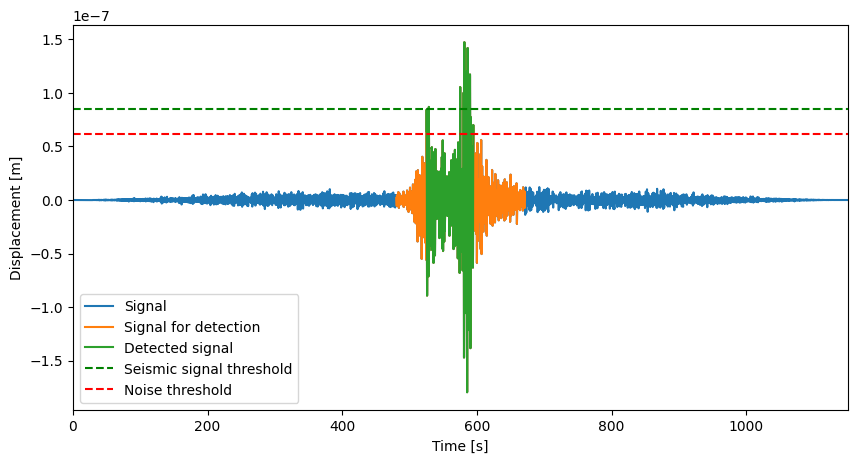

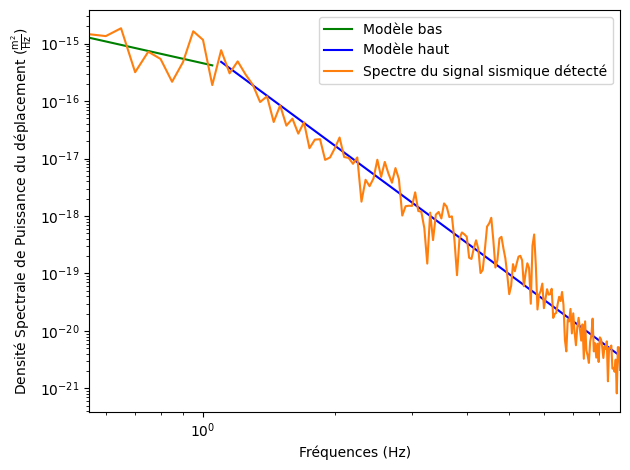

-------------------------
Event numero 5
-------------------------
The distance of the trace is 41.30901063049271
Detection on trace 0


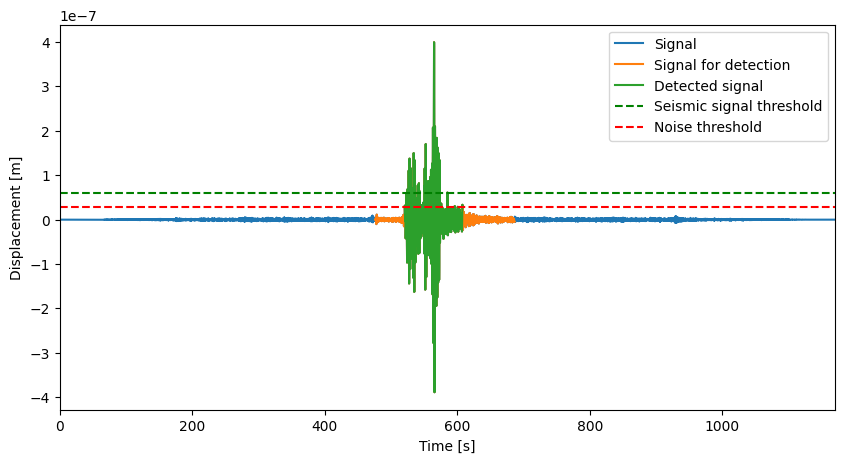

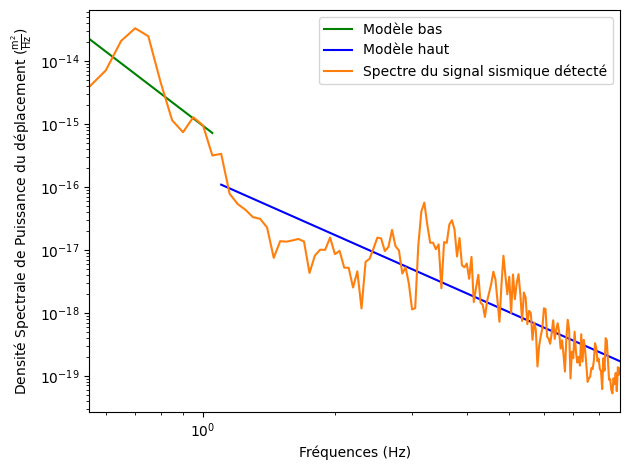

-------------------------
Event numero 6
-------------------------
The distance of the trace is 156.3475108523247
Detection on trace 0


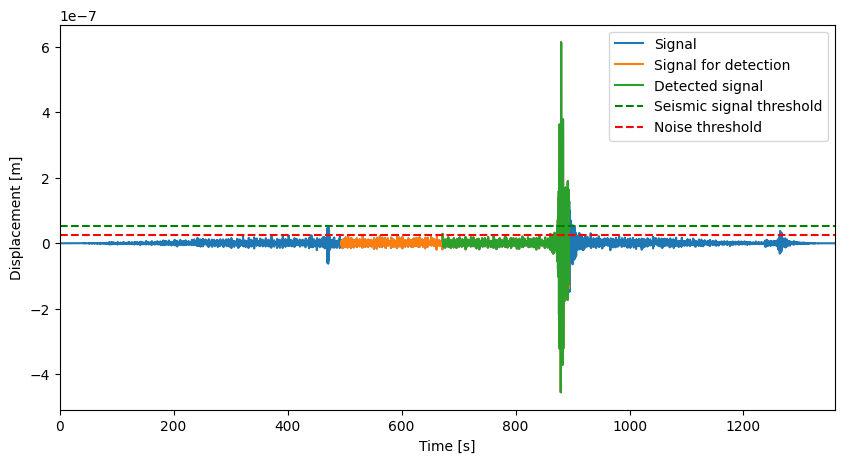

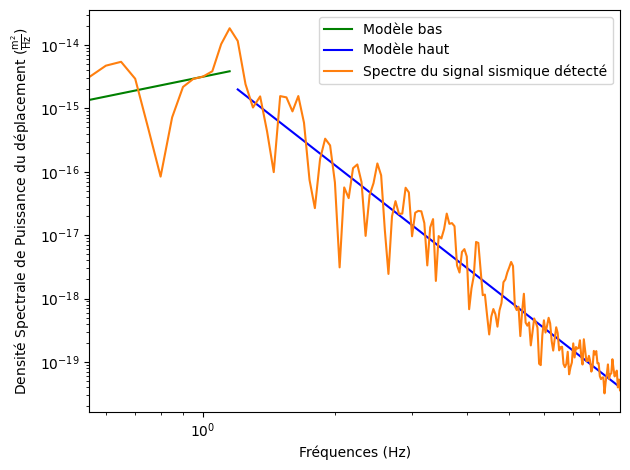

-------------------------
Event numero 8
-------------------------
The distance of the trace is 80.84173760387873
Detection on trace 0


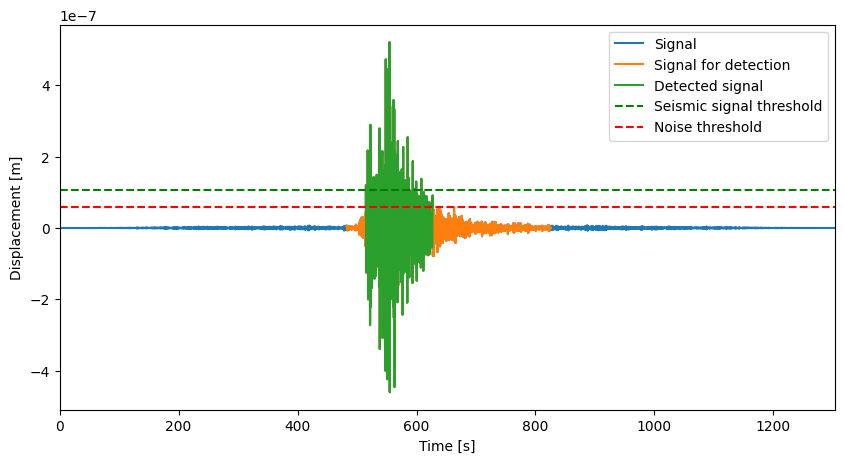

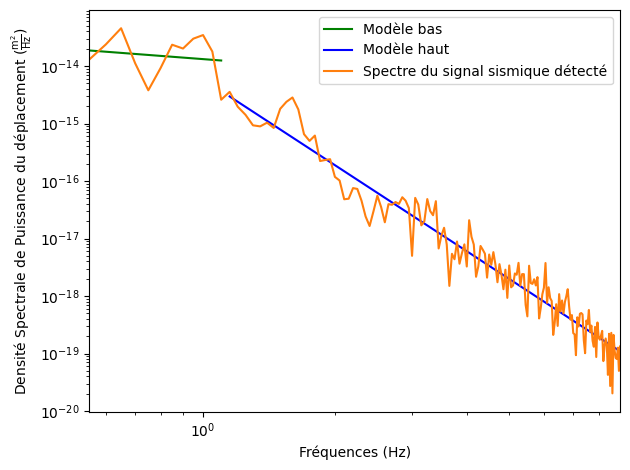

-------------------------
Event numero 9
-------------------------
The distance of the trace is 63.49445548122539
Detection on trace 0


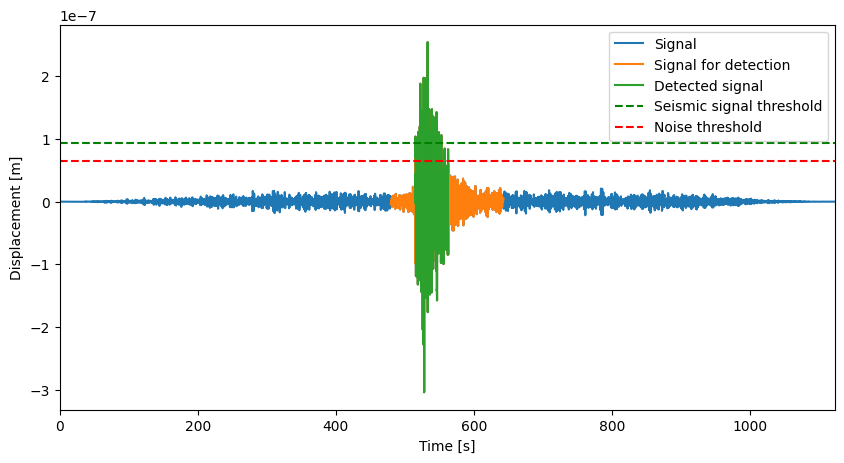

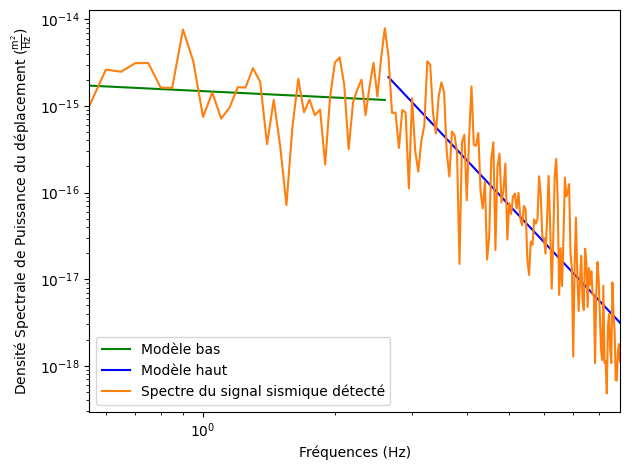

-------------------------
Event numero 10
-------------------------
The distance of the trace is 6.713114336267443
Detection on trace 0


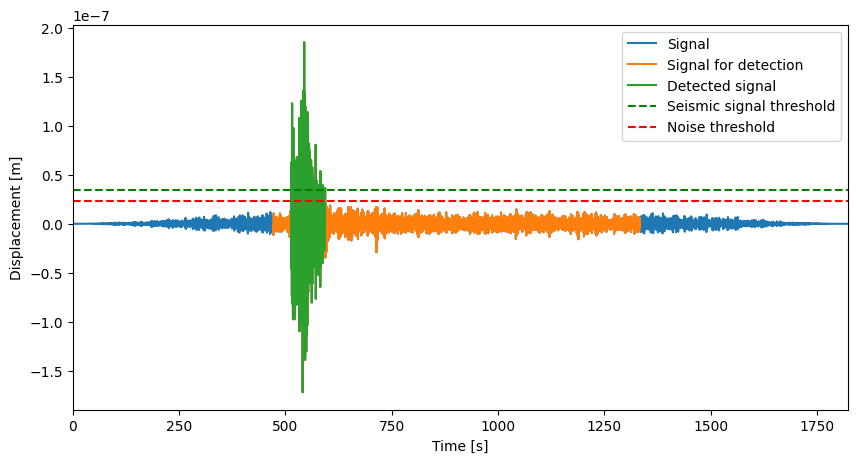

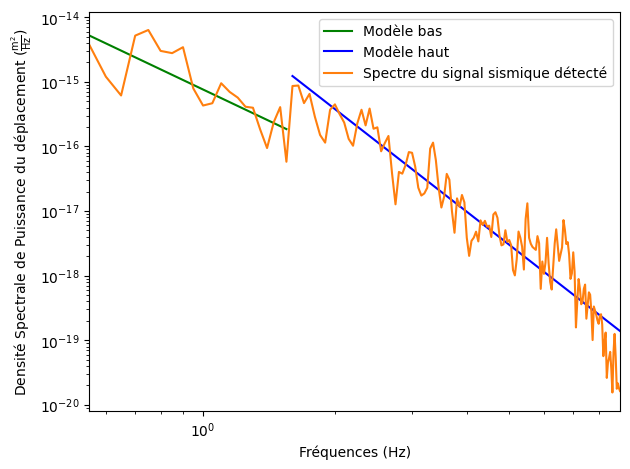

-------------------------
Event numero 11
-------------------------
The distance of the trace is 5.755487205375801
Detection on trace 0


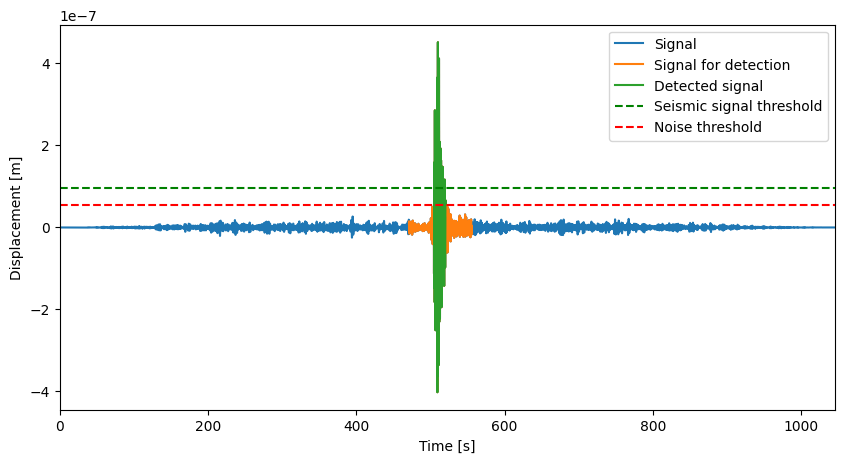

C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 771, using nperseg = 771
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


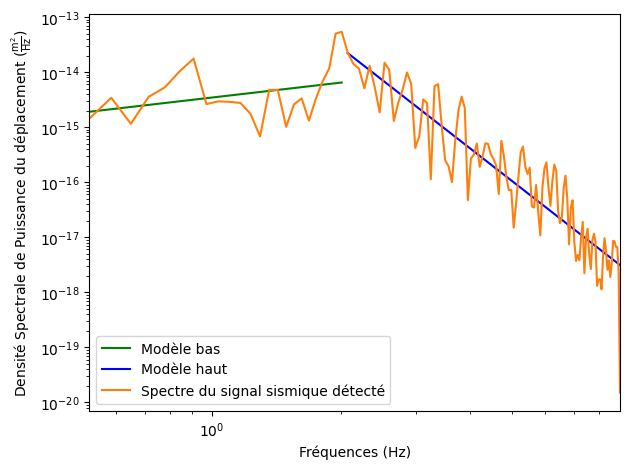

-------------------------
Event numero 21
-------------------------
The distance of the trace is 71.8558083991807
Detection on trace 0


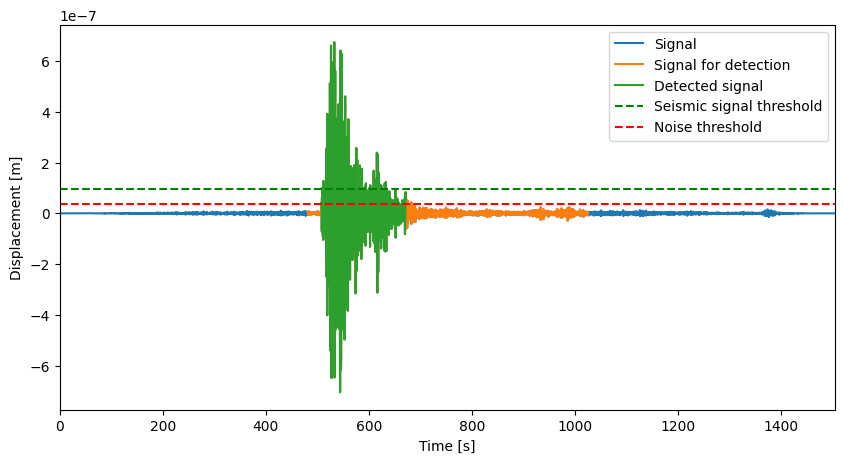

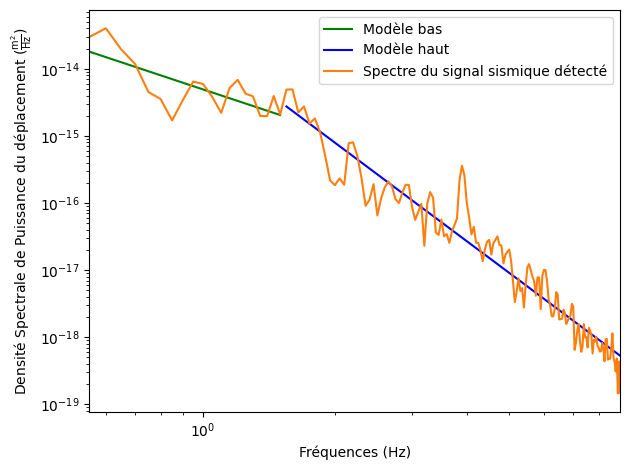

-------------------------
Event numero 22
-------------------------
The distance of the trace is 6.338558874564575
Detection on trace 0


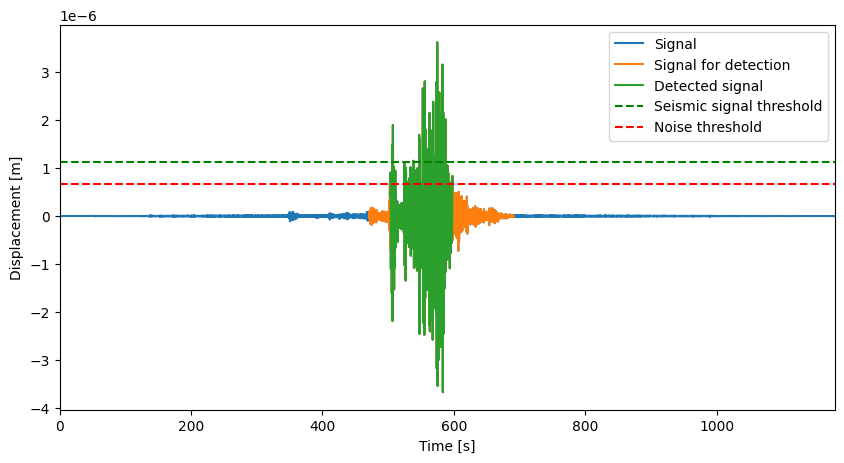

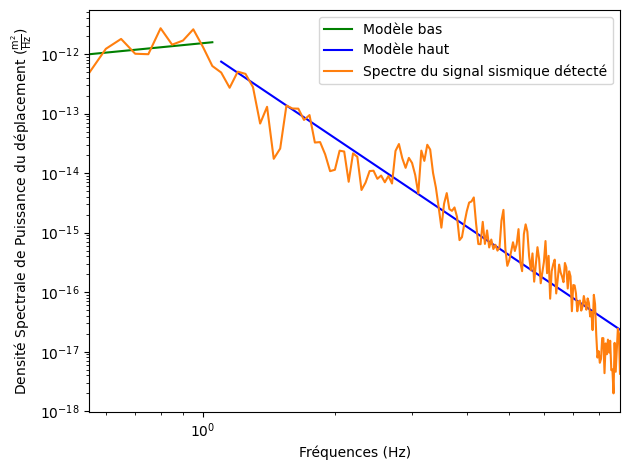

-------------------------
Event numero 23
-------------------------
The distance of the trace is 50.68000097637431
Detection on trace 0


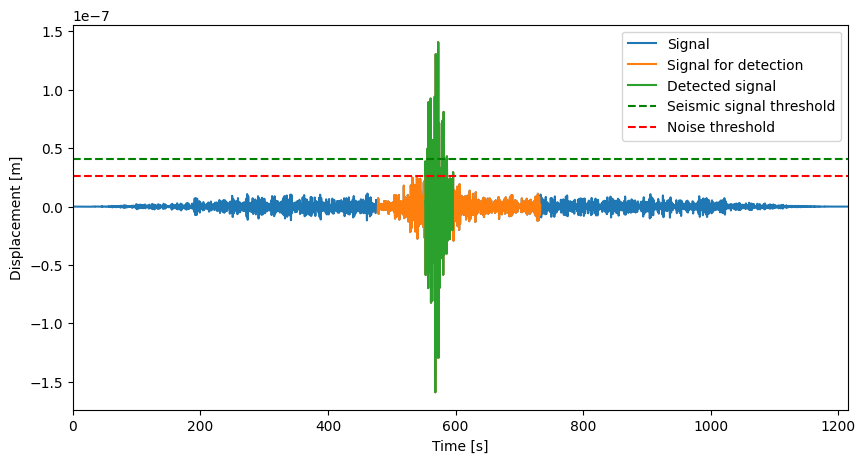

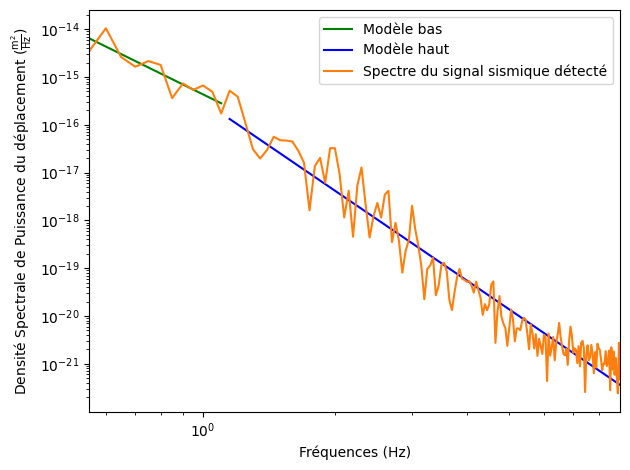

-------------------------
Event numero 24
-------------------------
The distance of the trace is 18.18161655717009
Detection on trace 0


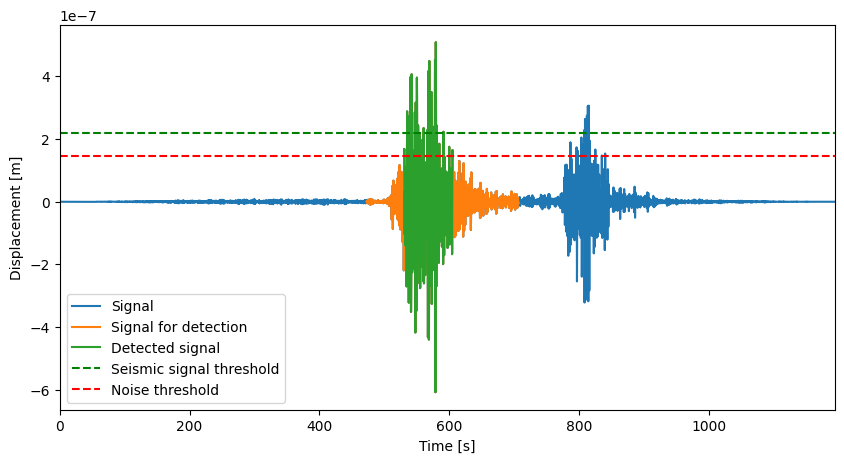

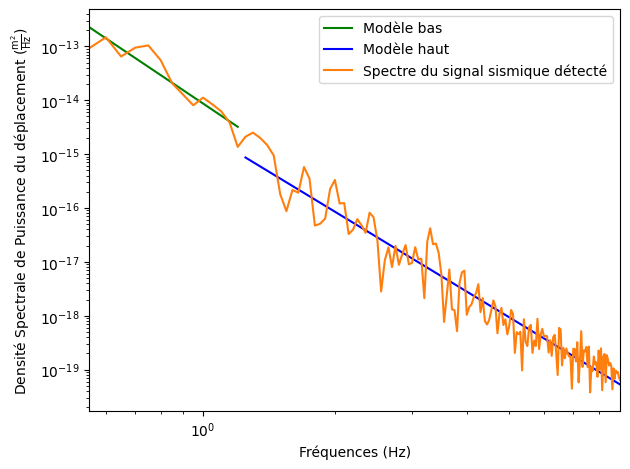

-------------------------
Event numero 26
-------------------------
The distance of the trace is 56.16851705097798
Detection on trace 0


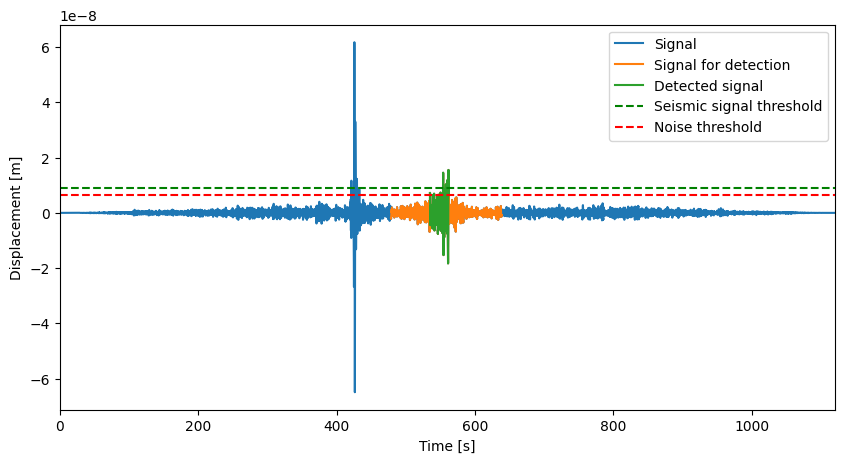

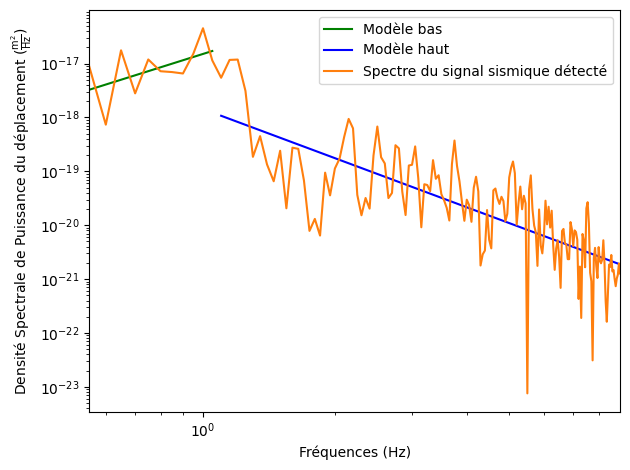

-------------------------
Event numero 27
-------------------------
The distance of the trace is 71.03478628398895
Detection on trace 0


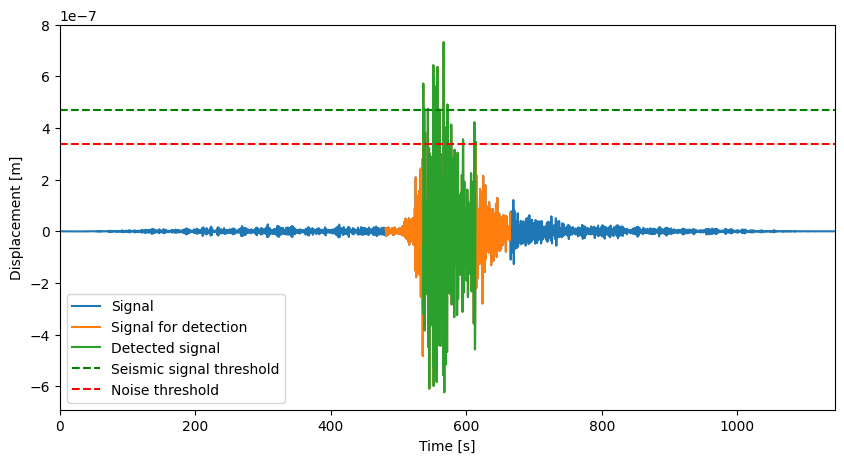

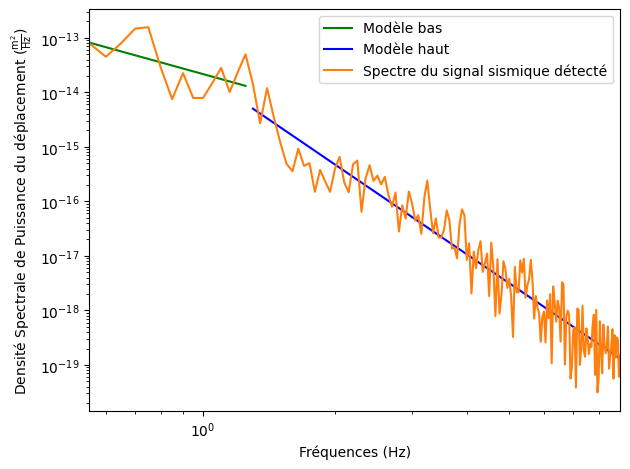

-------------------------
Event numero 28
-------------------------
The distance of the trace is 46.94814284832026
Detection on trace 0


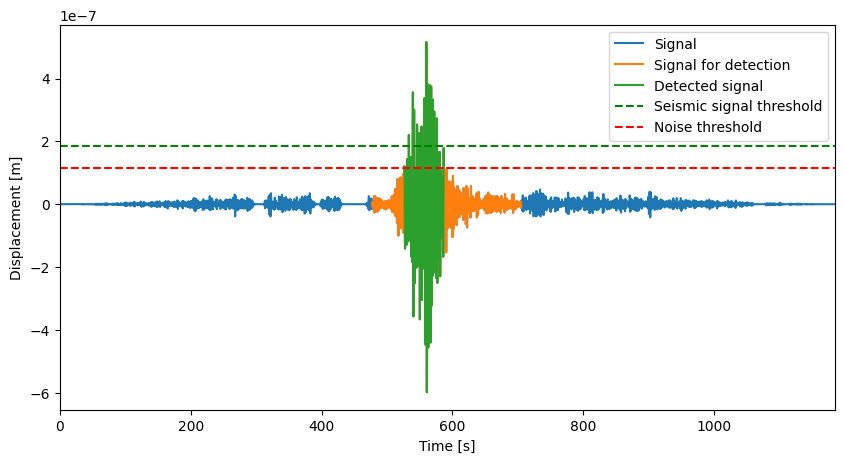

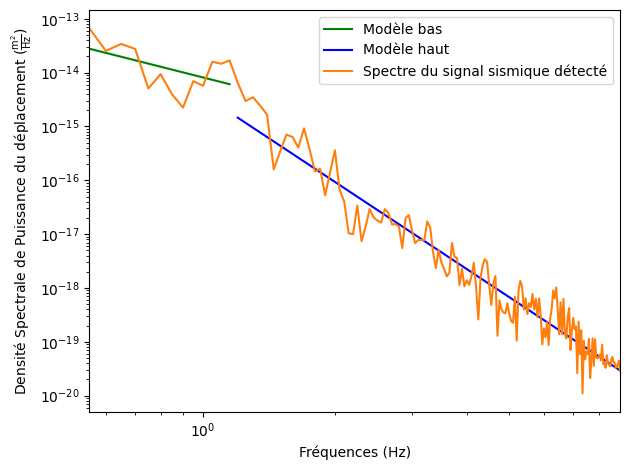

-------------------------
Event numero 32
-------------------------
The distance of the trace is 15.753280920469651
Detection on trace 0


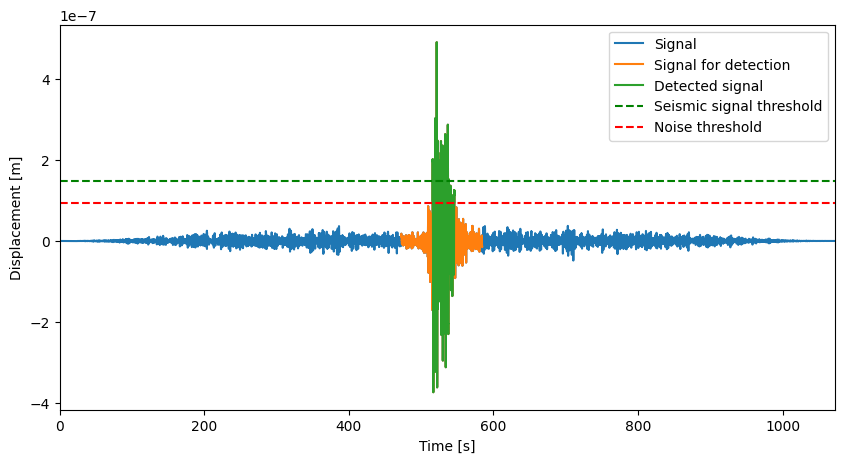

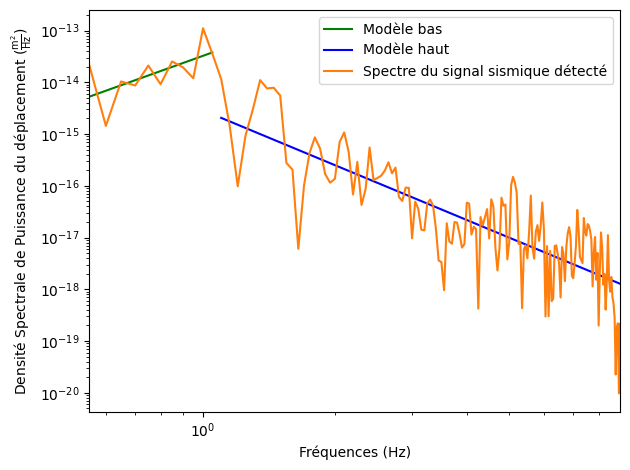

-------------------------
Event numero 33
-------------------------
The distance of the trace is 87.52942092725412
Detection on trace 0


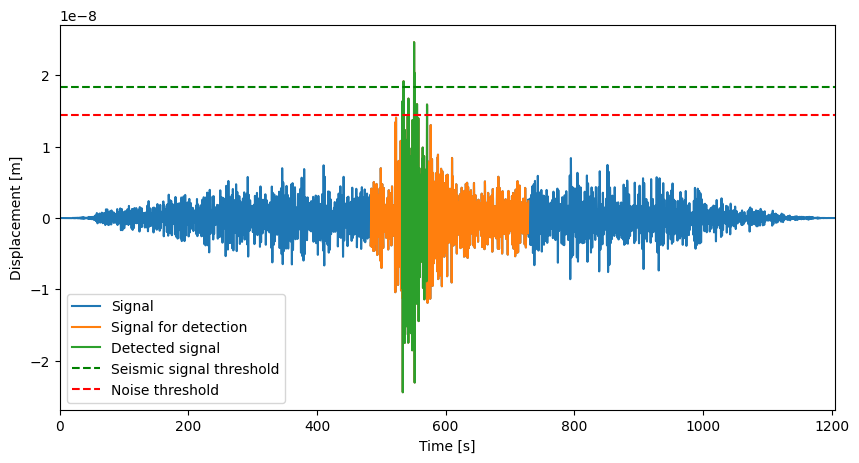

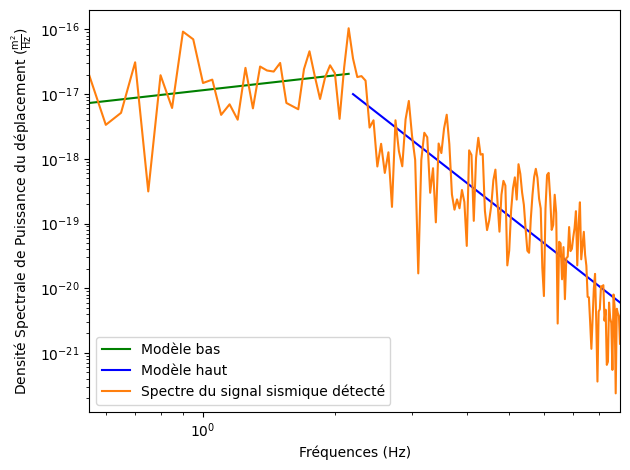

-------------------------
Event numero 36
-------------------------
The distance of the trace is 12.03527266793596
Detection on trace 0


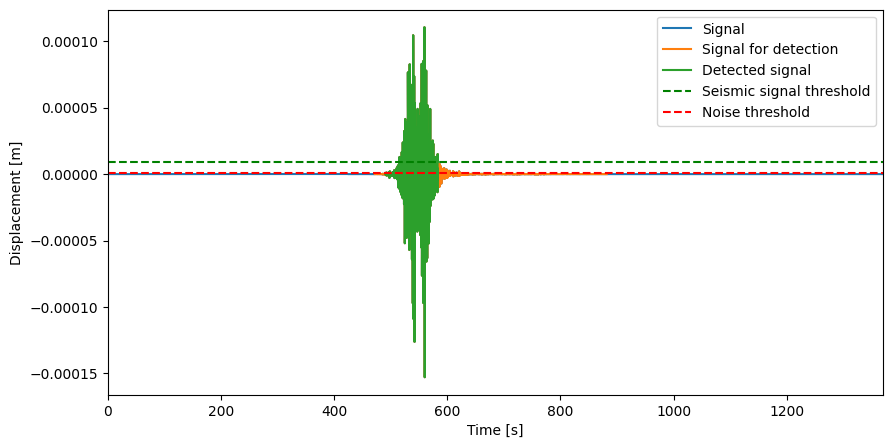

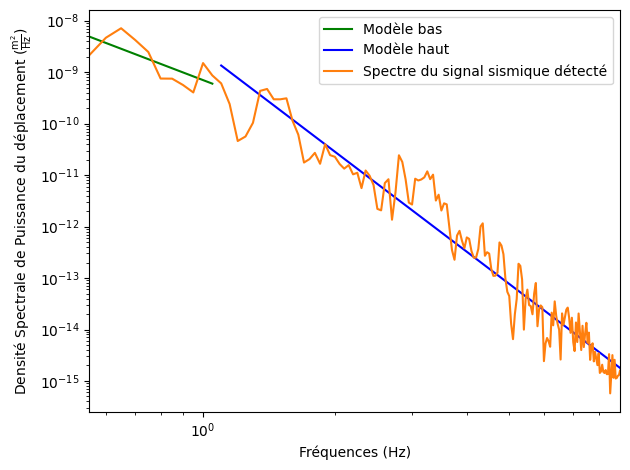

-------------------------
Event numero 37
-------------------------
The distance of the trace is 15.002437637969912
Detection on trace 0


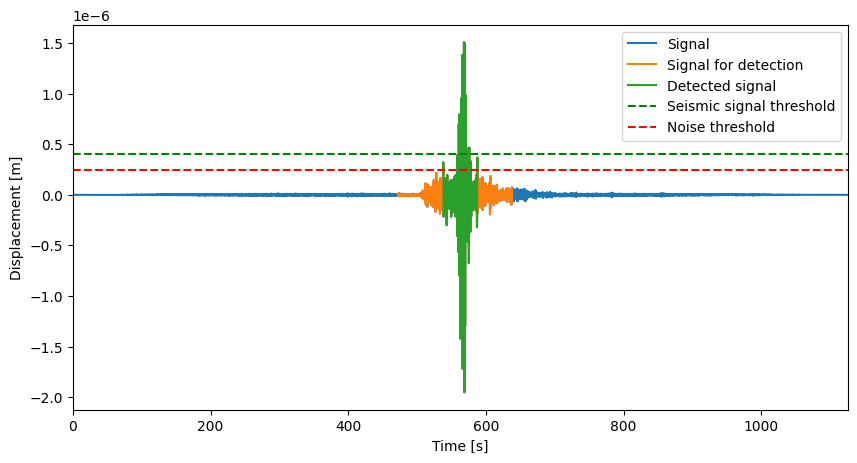

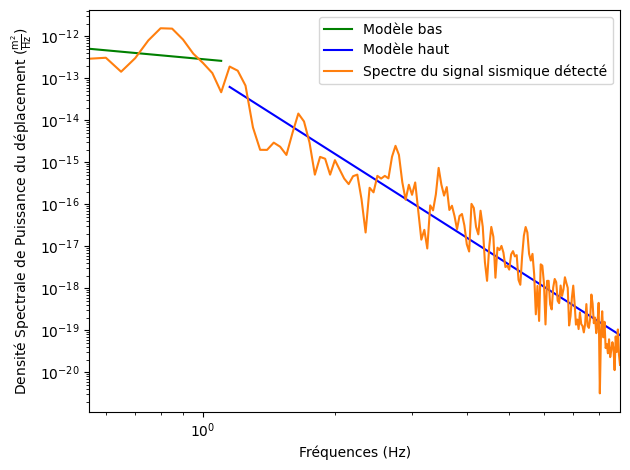

-------------------------
Event numero 38
-------------------------
The distance of the trace is 35.32501028979229
Detection on trace 0


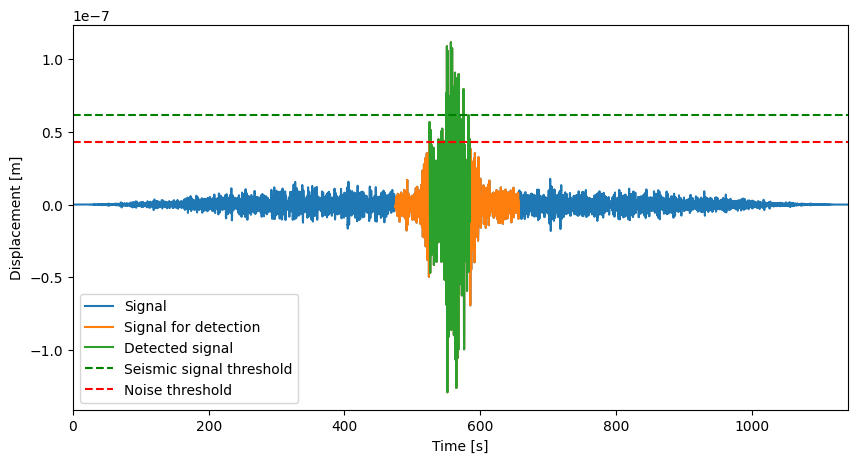

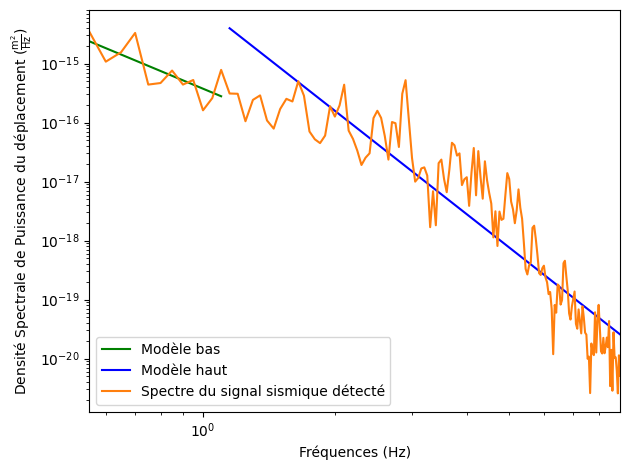

-------------------------
Event numero 39
-------------------------
The distance of the trace is 24.47873020467683
Detection on trace 0


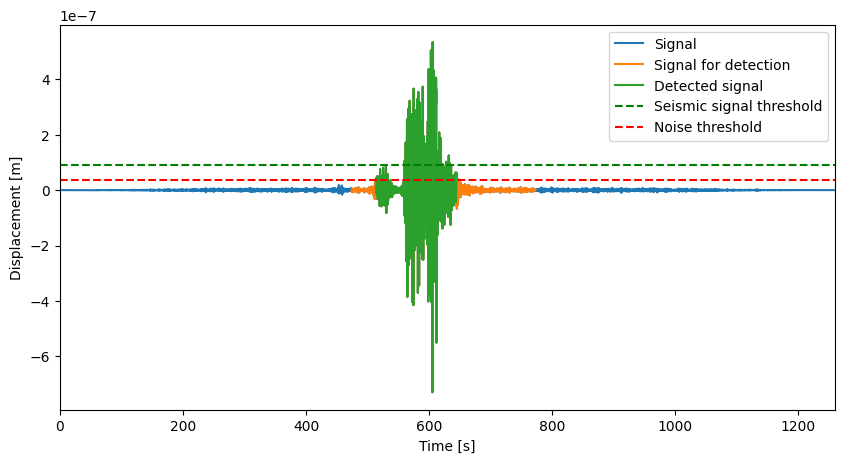

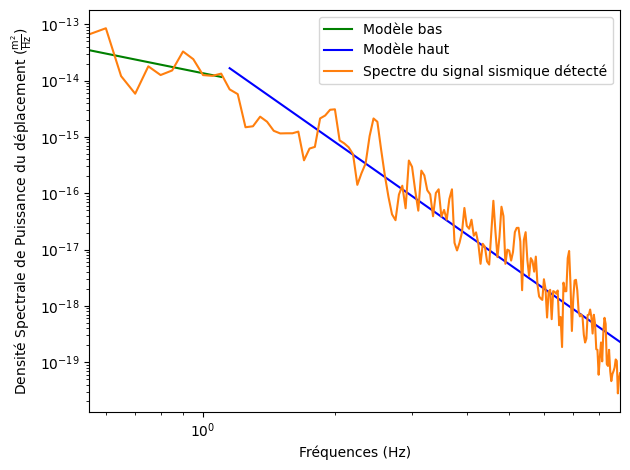

-------------------------
Event numero 40
-------------------------
The distance of the trace is 48.81039753705775
Detection on trace 0


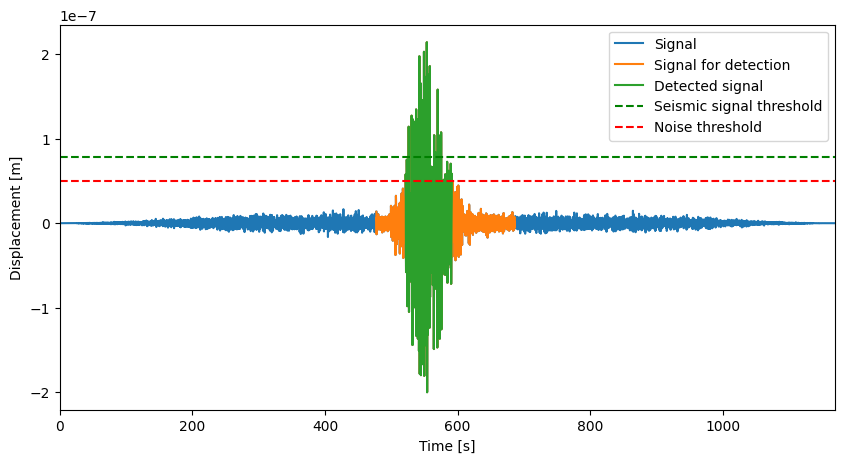

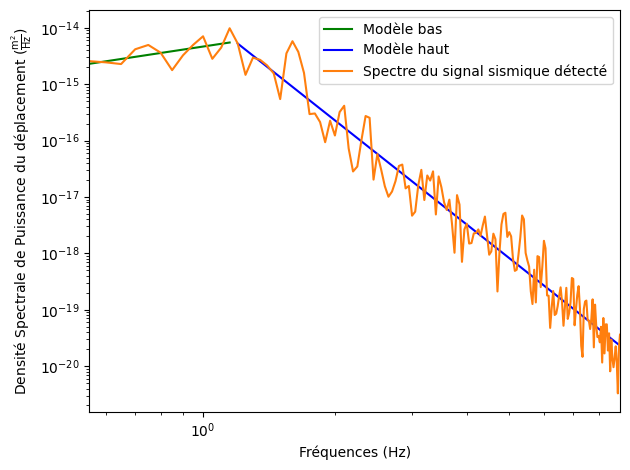

-------------------------
Event numero 41
-------------------------
The distance of the trace is 10.939019253784037
Detection on trace 0


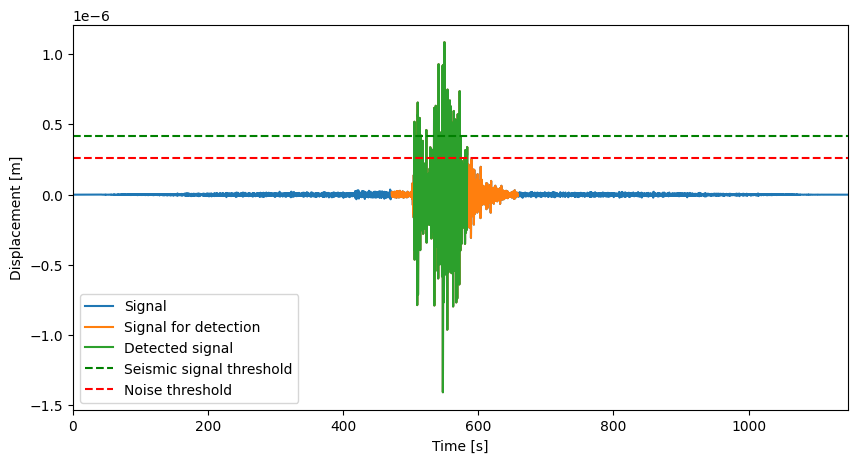

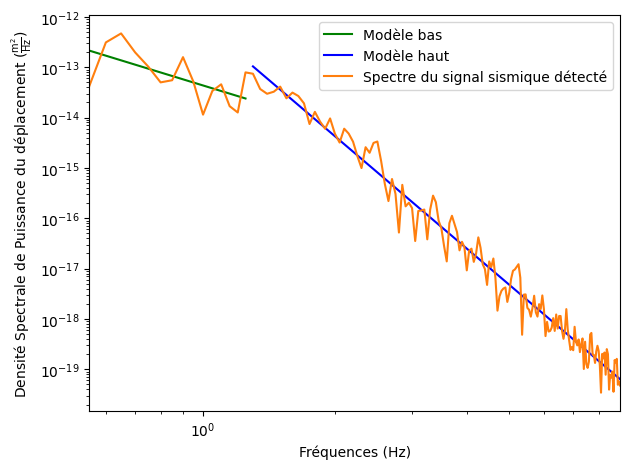

-------------------------
Event numero 42
-------------------------
The distance of the trace is 69.66579433857272
Detection on trace 0


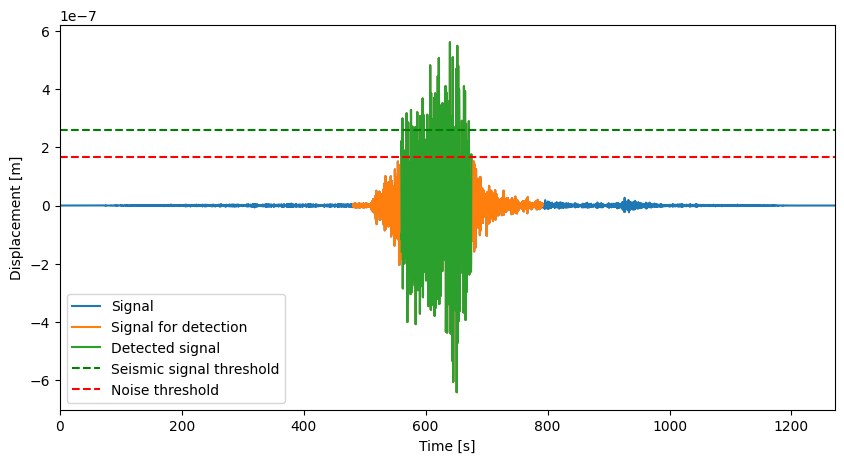

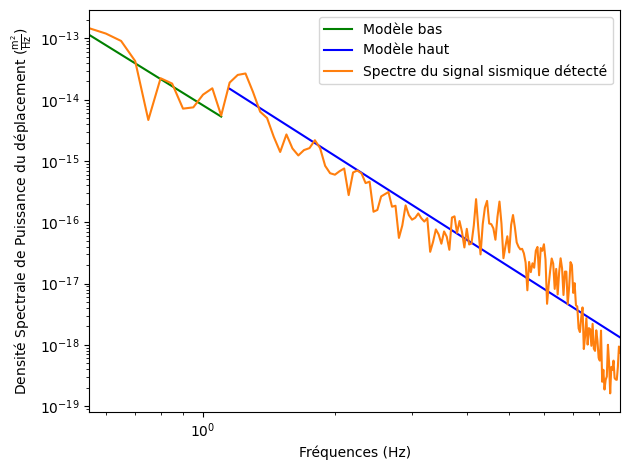

-------------------------
Event numero 43
-------------------------
The distance of the trace is 374.1234855626473
Detection on trace 0


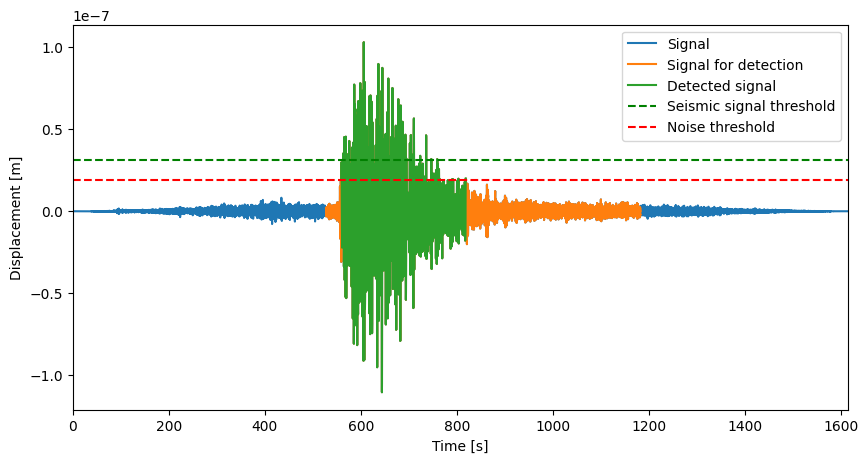

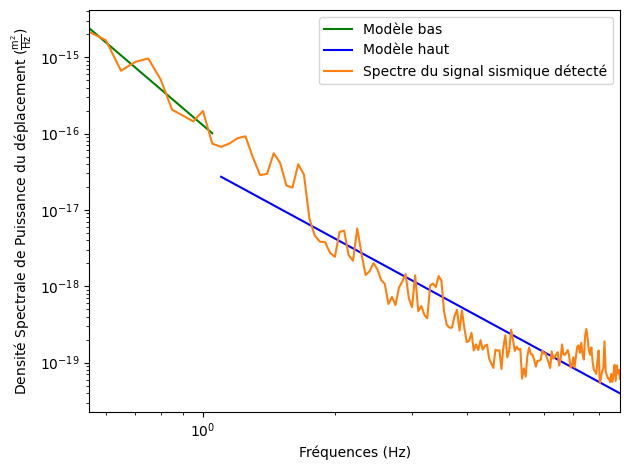

-------------------------
Event numero 44
-------------------------
The distance of the trace is 87.52942092725412
Detection on trace 0


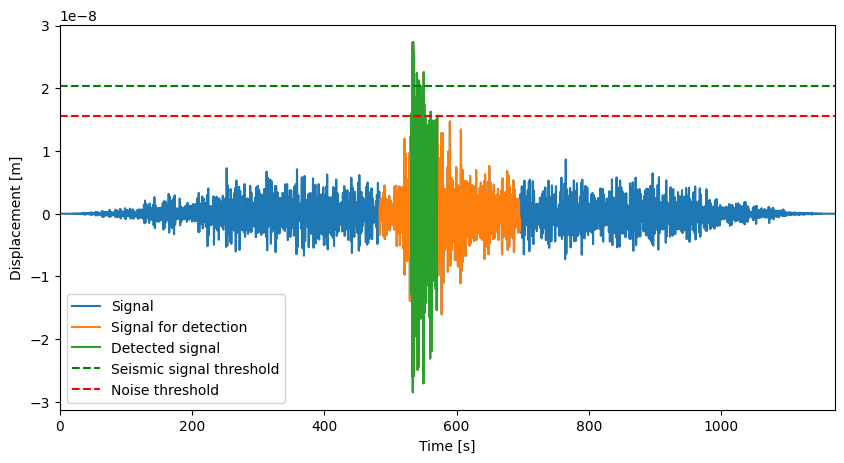

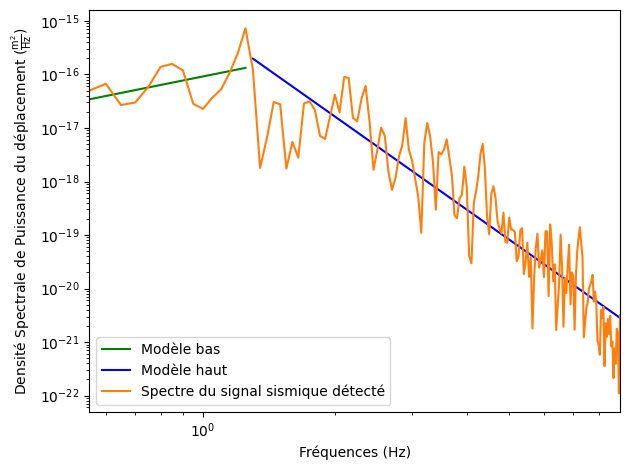

-------------------------
Event numero 46
-------------------------
The distance of the trace is 28.39509627026777
Detection on trace 0


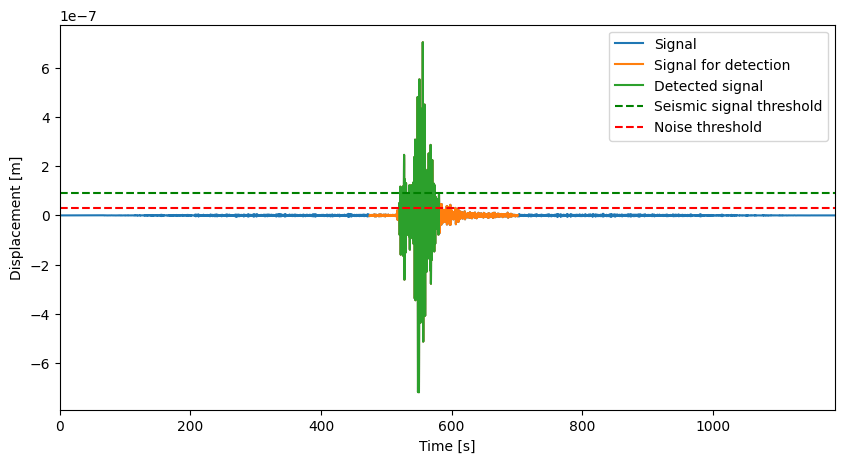

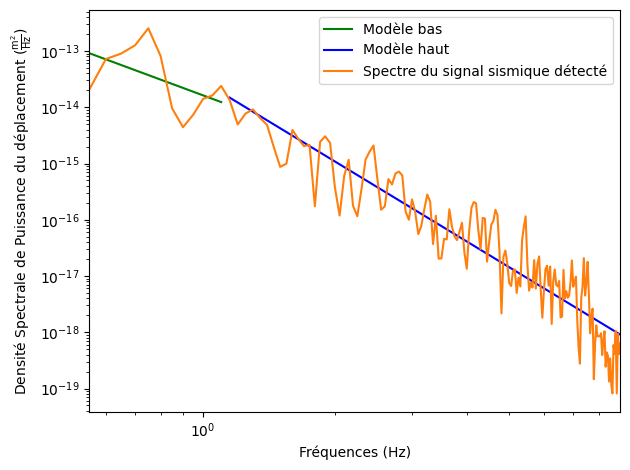

-------------------------
Event numero 47
-------------------------
The distance of the trace is 65.4712195650786
Detection on trace 0


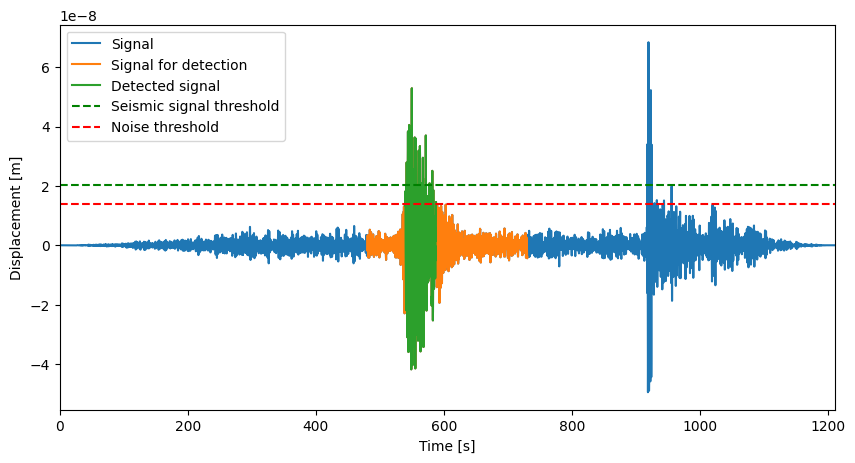

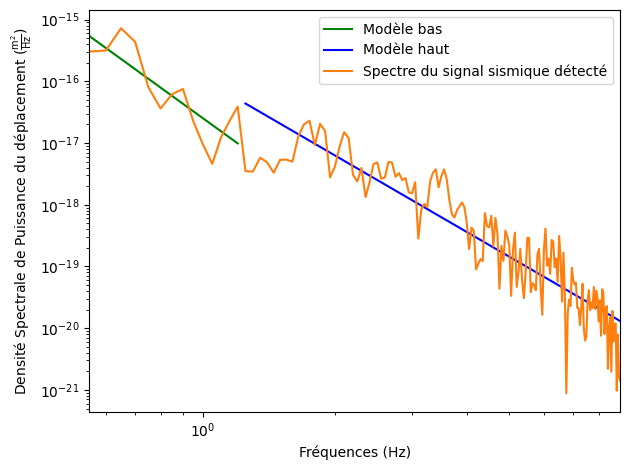

-------------------------
Event numero 48
-------------------------


In [3]:
## Loop over all the events
for event_index in tqdm(ESEC_avalanches["numero"], total=len(ESEC_avalanches)):
        
    #if event_index == 8: ## Uncomment this line if you want to see a specific event

        print("-------------------------")
        print("Event number", event_index)
        print("-------------------------")
        
        ## Filter the stream
        _, stream, trace = analysis.filter_stream(ESEC_avalanches, event_index, 0, freq_HP=9, freq_LP=0.5, max_percentage=0.3)

        ## The detection method
        time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, upper_threshold, lower_threshold, _ = analysis.detection_on_one_trace(trace, ESEC_avalanches, event_index, 0, -30, 10, detection_yes_or_no=[])        
        
        ## Plot the signal
        figures.plot_detected_signal(time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, upper_threshold, lower_threshold)
        plt.show()

        ## Plot the spectrum with the models and extract featues in a dataframe
        analysis.plot_spectre(trace, ESEC_avalanches, trimmed_data, 0, event_index, conserv_result=True)
        plt.show()